In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
df_WHR_2021 = pd.read_csv('2_Prepaired_Data/WHR_2021_Prepaired_2023-07-17-21-24-42.csv')
df_WHR = pd.read_csv('2_Prepaired_Data/WHR_Prepaired_2023-07-17-21-24-42.csv')
df_Suicidal = pd.read_csv('2_Prepaired_Data/Suicidal_Prepaired_2023-07-17-21-24-42.csv')

In [3]:
freedom_ranks_2021 = df_WHR_2021.sort_values(['Ladder score'],ascending= False).reset_index()
freedom_ranks_2021 = freedom_ranks_2021[['Country name' , 'Ladder score','Freedom to make life choices']]
freedom_ranks_2021_Freedom = freedom_ranks_2021.sort_values(['Freedom to make life choices'],ascending= False)[0:20]
freedom_ranks_2021_Score = freedom_ranks_2021.sort_values(['Ladder score'],ascending= False)[0:20]

In [4]:
freedom_ranks_2021_Freedom[freedom_ranks_2021_Freedom.index < 50].count()[0]/len(freedom_ranks_2021_Score)

0.8

In [5]:
def Freedom_Ranks_Calculated(year,Ladder,Freedom,Countryname):
    freedom_ranks = df_WHR[df_WHR.year == year ].sort_values([Ladder],ascending= False).reset_index()
    freedom_ranks = freedom_ranks[[Countryname, Ladder, Freedom]]
    freedom_ranks_Freedom = freedom_ranks.sort_values([Freedom],ascending= False)[0:20]
    freedom_ranks_Score = freedom_ranks_Freedom.sort_values([Ladder],ascending= False)[0:20]
    return freedom_ranks_Freedom[freedom_ranks_Freedom.index < 50].count()[0]/len(freedom_ranks_Score)

>  80 % of the `top 20 countries` with the heighst `freedom` score are in the top `50` Happiest countries in `2021`

> 75 % of the `top 20 countries` with the heighst `freedom` score are in the top `50` Happiest countries in `2020`

In [6]:
df_Year = [[i,
    Freedom_Ranks_Calculated(
        i,
        'Life Ladder',
        'Freedom to make life choices',
        'Country name'
    )] for i in reversed(range(2020,2004,-1))]
df_Year.append([2021,0.8])

df_Year= pd.DataFrame(df_Year, columns =['Year', 'Percentage']) 
print(df_Year )

    Year  Percentage
0   2005        1.00
1   2006        0.90
2   2007        0.80
3   2008        0.85
4   2009        0.60
5   2010        0.85
6   2011        0.90
7   2012        0.90
8   2013        0.80
9   2014        0.85
10  2015        0.80
11  2016        0.80
12  2017        0.85
13  2018        0.80
14  2019        0.75
15  2020        0.75
16  2021        0.80


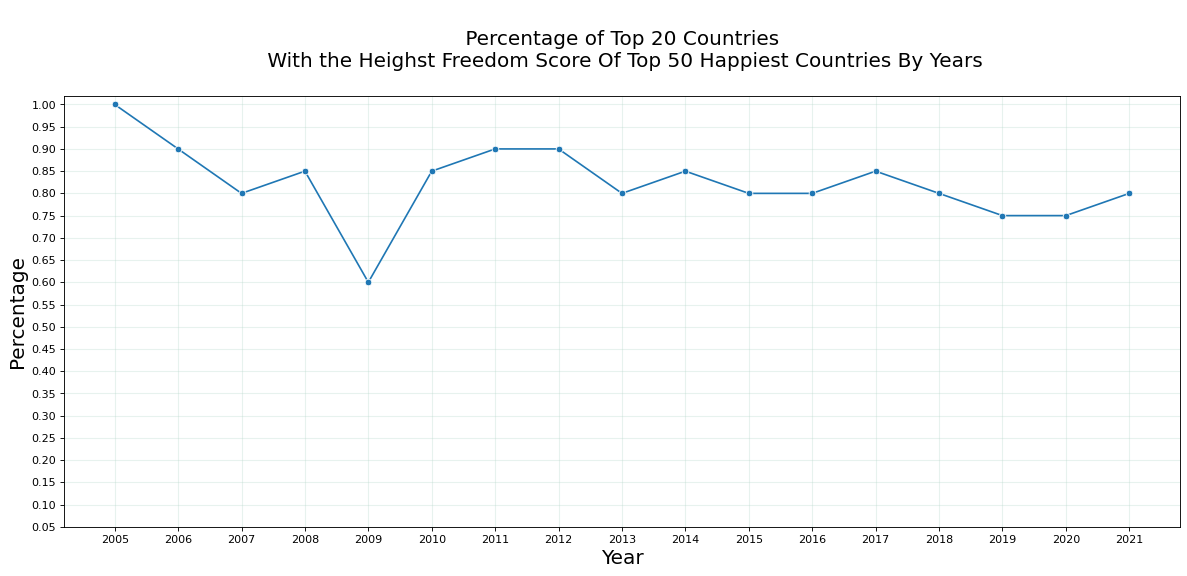

In [7]:
fig, ax = plt.subplots(figsize = (18,7), dpi = 80)
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)

sns.lineplot(data=df_Year, x='Year',y='Percentage' ,marker='o',alpha = 1)
plt.yticks(list(map(lambda x: x/100.0, range(5, 105,5))))
plt.xticks(df_Year['Year'])

plt.title('\n Percentage of Top 20 Countries \n With the Heighst Freedom Score Of Top 50 Happiest Countries By Years\n', size=18)
plt.xlabel('Year', size=18)
plt.ylabel('Percentage', size = 18)
plt.show()

In [138]:
dfx=pd.merge(
    pd.Series(freedom_ranks_2020['Country name'].unique(),
              name = 'Happy_2020'),
    pd.Series(freedom_ranks_2021['Country name'].unique(),
              name='Happy_2021'),
    left_on='Happy_2020',
    right_on='Happy_2021',
    how='right')

dfx

,Happy_2020,Happy_2021
0,NaN,Uzbekistan
1,Norway,Norway
2,Cambodia,Cambodia
3,Iceland,Iceland
4,Finland,Finland
5,Slovenia,Slovenia
6,Denmark,Denmark
7,Sweden,Sweden
8,NaN,Vietnam
9,Kyrgyz Republic,Kyrgyz Republic


In [139]:
freedom_ranks_2019_2021 = freedom_ranks_2019[freedom_ranks_2019['Country name'].isin(freedom_ranks_2021['Country name'])]
len(freedom_ranks_2019_2021['Country name'])/len(freedom_ranks_2021['Country name'])

0.85

In [140]:
dfy=pd.merge(
    pd.Series(freedom_ranks_2019['Country name'],
              name = 'Happy_2019'),
    dfx,
    left_on='Happy_2019',
    right_on='Happy_2021',
    how='right')

dfy

,Happy_2019,Happy_2020,Happy_2021
0,Uzbekistan,NaN,Uzbekistan
1,Norway,Norway,Norway
2,Cambodia,Cambodia,Cambodia
3,Iceland,Iceland,Iceland
4,Finland,Finland,Finland
5,Slovenia,Slovenia,Slovenia
6,Denmark,Denmark,Denmark
7,Sweden,Sweden,Sweden
8,Vietnam,NaN,Vietnam
9,Kyrgyz Republic,Kyrgyz Republic,Kyrgyz Republic


In [141]:
dfz=pd.merge(
    pd.Series(freedom_ranks_2018['Country name'],
              name = 'Happy_2018'),
    dfy,
    left_on='Happy_2018',
    right_on='Happy_2021',
    how='right')

dfz

,Happy_2018,Happy_2019,Happy_2020,Happy_2021
0,Uzbekistan,Uzbekistan,NaN,Uzbekistan
1,Norway,Norway,Norway,Norway
2,Cambodia,Cambodia,Cambodia,Cambodia
3,NaN,Iceland,Iceland,Iceland
4,Finland,Finland,Finland,Finland
5,Slovenia,Slovenia,Slovenia,Slovenia
6,Denmark,Denmark,Denmark,Denmark
7,Sweden,Sweden,Sweden,Sweden
8,NaN,Vietnam,NaN,Vietnam
9,Kyrgyz Republic,Kyrgyz Republic,Kyrgyz Republic,Kyrgyz Republic


In [65]:
freedom_ranks_2021[freedom_ranks_2021['Country name'] == 'Malta']

NameError: name 'freedom_ranks_2021' is not defined

In [143]:
Malta = df_WHB[df_WHB.year == 2020 ].sort_values(['Freedom to make life choices'],ascending= False).reset_index()

In [144]:
Malta[Malta ['Country name'] == 'Malta' ] 

,index,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,1087,Malta,2020,6.157,NaN,0.938,72.2,0.931,NaN,0.675,0.601,0.411


In [145]:
freedom_ranks_2020

,Country name,year
0,Norway,2020
1,Cambodia,2020
2,Finland,2020
3,Slovenia,2020
4,Estonia,2020
5,Sweden,2020
6,Iceland,2020
7,Bahrain,2020
8,United Arab Emirates,2020
9,Denmark,2020
